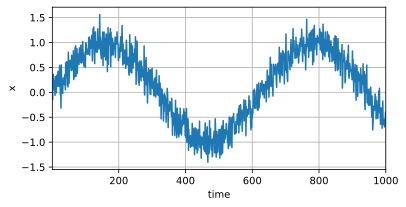

In [6]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

T = 1000
time = torch.arange(1, T + 1, dtype=torch.float32)
x = torch.sin(0.01 * time) + torch.normal(0, 0.2, (T,))
d2l.plot(time, [x], 'time', 'x', xlim=[1, 1000], figsize=(6, 3))

In [7]:
tau = 4
features = torch.zeros((T - tau, tau))
for i in range(tau):
    features[:, i] = x[i:T - tau + i]
labels = x[tau:].reshape((-1, 1))

batch_size, n_train = 16, 600
train_iter = d2l.load_array((features[:n_train], labels[:n_train]),
                            batch_size, is_train=True)
print(features.size())
print(labels.size())
print(features[:4])
print(labels[:4])
print(train_iter)

torch.Size([996, 4])
torch.Size([996, 1])
tensor([[-0.0118, -0.1481,  0.2614,  0.3617],
        [-0.1481,  0.2614,  0.3617,  0.1130],
        [ 0.2614,  0.3617,  0.1130,  0.0556],
        [ 0.3617,  0.1130,  0.0556,  0.2384]])
tensor([[0.1130],
        [0.0556],
        [0.2384],
        [0.1487]])


In [8]:
def init_weights(m):
    print('init_weights', type(m))
    if type(m) == nn.Linear:
        print('    Initialize', type(m))
        nn.init.xavier_uniform_(m.weight)

def get_net():
    net = nn.Sequential(nn.Linear(4, 10), nn.ReLU(), nn.Linear(10, 1))
    print('Uninitialized', type(net))
    net.apply(init_weights)
    return net
## Does not understand how to initialize the weights, apply()
loss = nn.MSELoss()

In [27]:
net = get_net()
type(net)
print(type(net)==nn.Linear)

Uninitialized <class 'torch.nn.modules.container.Sequential'>
init_weights <class 'torch.nn.modules.linear.Linear'>
    Initialize <class 'torch.nn.modules.linear.Linear'>
init_weights <class 'torch.nn.modules.activation.ReLU'>
init_weights <class 'torch.nn.modules.linear.Linear'>
    Initialize <class 'torch.nn.modules.linear.Linear'>
init_weights <class 'torch.nn.modules.container.Sequential'>
False


# Takeaway 
-  torch.nn.Module.apply

   https://pytorch.org/docs/stable/generated/torch.nn.Module.html

In [9]:
def train(net, train_iter, loss, epochs, lr):
    trainer = torch.optim.Adam(net.parameters(), lr)
    for epoch in range(epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            trainer.step()
        print(f'epoch {epoch + 1}, '
              f'loss: {d2l.evaluate_loss(net, train_iter, loss):f}')

net = get_net()



Uninitialized <class 'torch.nn.modules.container.Sequential'>
init_weights <class 'torch.nn.modules.linear.Linear'>
    Initialize <class 'torch.nn.modules.linear.Linear'>
init_weights <class 'torch.nn.modules.activation.ReLU'>
init_weights <class 'torch.nn.modules.linear.Linear'>
    Initialize <class 'torch.nn.modules.linear.Linear'>
init_weights <class 'torch.nn.modules.container.Sequential'>


UsageError: Line magic function `%%time` not found.


In [10]:
%time train(net, train_iter, loss, 5, 0.01)

epoch 1, loss: 0.066489
epoch 2, loss: 0.055186
epoch 3, loss: 0.052682
epoch 4, loss: 0.050243
epoch 5, loss: 0.050597
CPU times: user 217 ms, sys: 7.07 ms, total: 224 ms
Wall time: 811 ms


ModuleNotFoundError: No module named 'pl_bolts'